In [1]:
import importlib
import numpy as np
import pandas as pd

np.set_printoptions(suppress=True)

In [41]:
import stocks
import agents.dsrqn
import environment
import simulation
import utils
import visualizations
importlib.reload(stocks)
importlib.reload(agents)
importlib.reload(agents.dsrqn)
importlib.reload(environment)
importlib.reload(simulation)
importlib.reload(utils)
importlib.reload(visualizations)
from stocks import Stocks
from agents.dsrqn import DSRQN
from environment import Env
from simulation import Simulation
from utils import *
from visualizations import *

stocks = Stocks(['MSFT', 'BA', 'GE'], start='2005-1-1', end='2008-1-1')
agent  = DSRQN()
env    = Env(stocks=stocks)

# Register the agent to the environment
env.register(agent)

sim = Simulation(stocks, agent, env)
sim.run(10)

Episode 0
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9


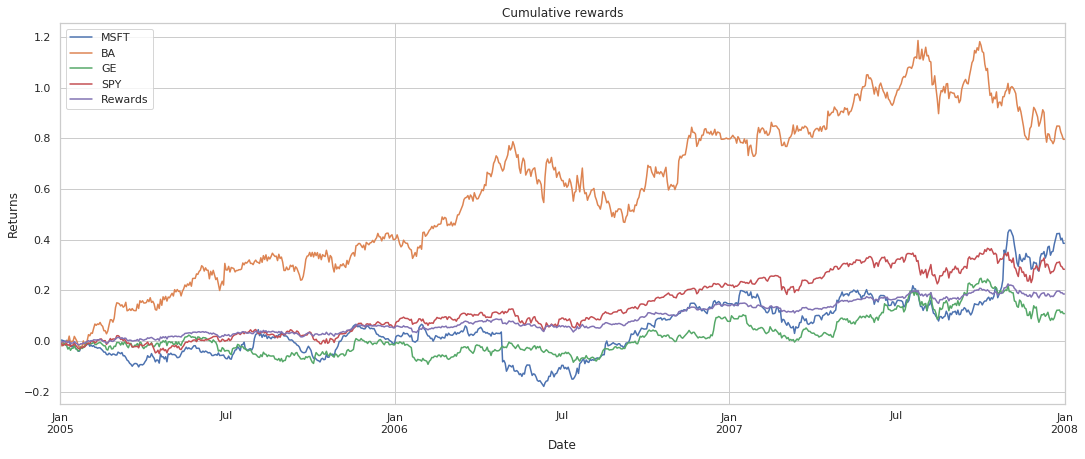

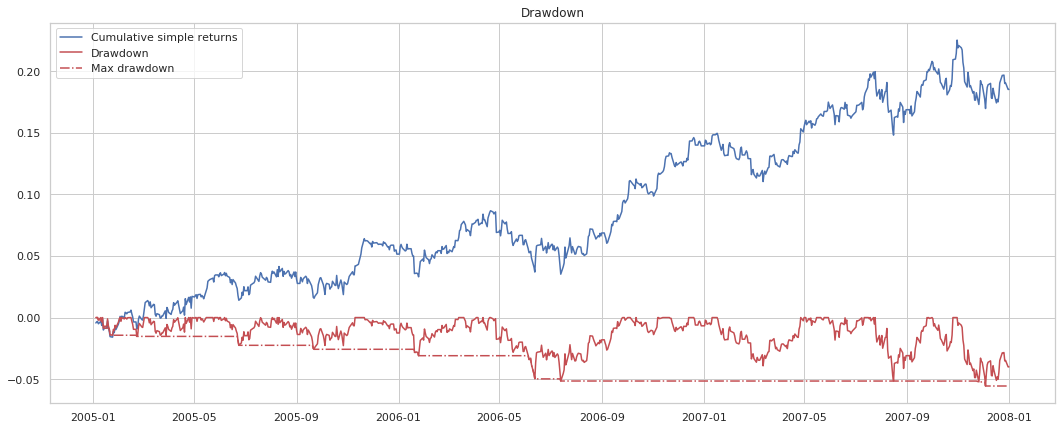

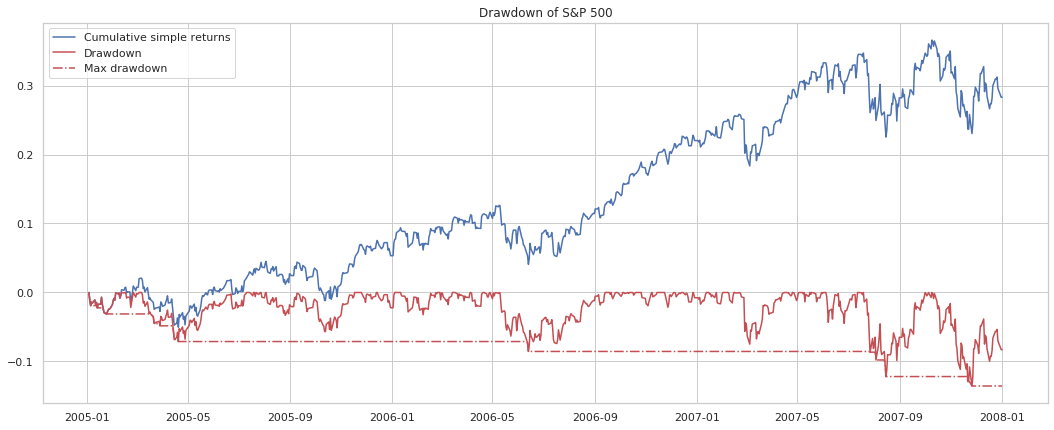

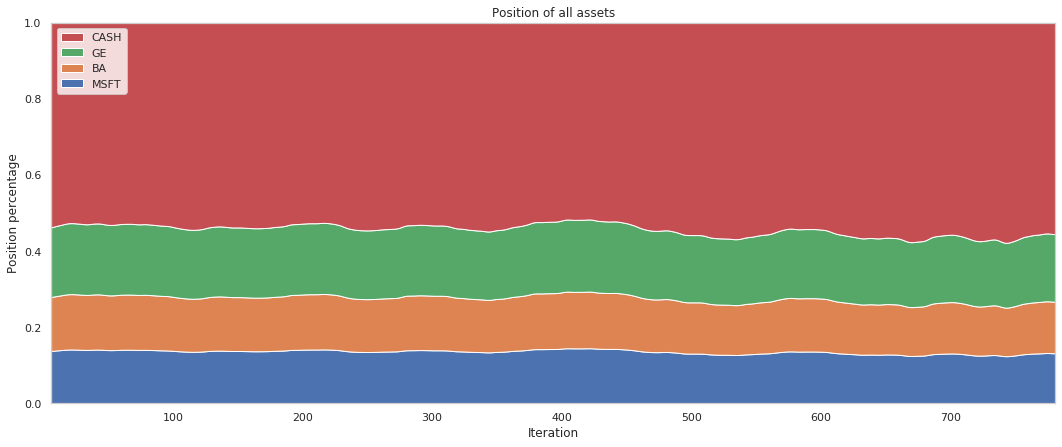

,Sharpe ratio
MSFT,1.13055
BA,1.75863
GE,0.524852
SPY,1.27328
Rewards,1.60536


In [42]:
def plot_results(episode):
    # Open the log file
    positions, rewards = agent.load_logs(episode)
    
    # Get the baseline stocks
    baseline = Stocks(['MSFT', 'BA', 'GE', 'SPY'], start='2005-1-1', end='2008-1-1')
    
    # Plot cumulative rewards
    plot_cumulative_returns(pd.concat([simple_returns(baseline.prices), rewards], 1))
    
    # Drawdown plot
    plot_drawdown(rewards)
    
    # Drawdown of the S&P index
    plot_drawdown(simple_returns(baseline.prices['SPY']), title='Drawdown of S&P 500')
    
    # Position percentages
    plot_positions(positions)
    
    return show_sharpe_ratio(pd.concat([simple_returns(baseline.prices), rewards], 1))
    
plot_results(9)